<a href="https://colab.research.google.com/github/josearangos/PDI/blob/Colab/Colab_Class/binarySegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

## Segmentación binaria


### Actividad

En esta clase se analiza una imagen binarizada de un carro(entrada) en donde se resalta la placa y se busca sacar solo la placa



In [2]:
! wget https://github.com/josearangos/PDI/raw/Colab/Resources/Image/placa_bina.png
! wget https://github.com/josearangos/PDI/raw/Colab/Resources/Image/carro_shape.jpg

--2020-04-02 23:57:55--  https://github.com/josearangos/PDI/raw/Colab/Resources/Image/placa_bina.png
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/josearangos/PDI/Colab/Resources/Image/placa_bina.png [following]
--2020-04-02 23:57:55--  https://raw.githubusercontent.com/josearangos/PDI/Colab/Resources/Image/placa_bina.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6484 (6.3K) [image/png]
Saving to: ‘placa_bina.png’

placa_bina.png      100%[===================>]   6.33K  --.-KB/s    in 0s      

2020-04-02 23:57:55 (103 MB/s) - ‘placa_bina.png’ saved [6484/6484]

--2020-04-02 23:57:56--  https

## Leemos la imagen

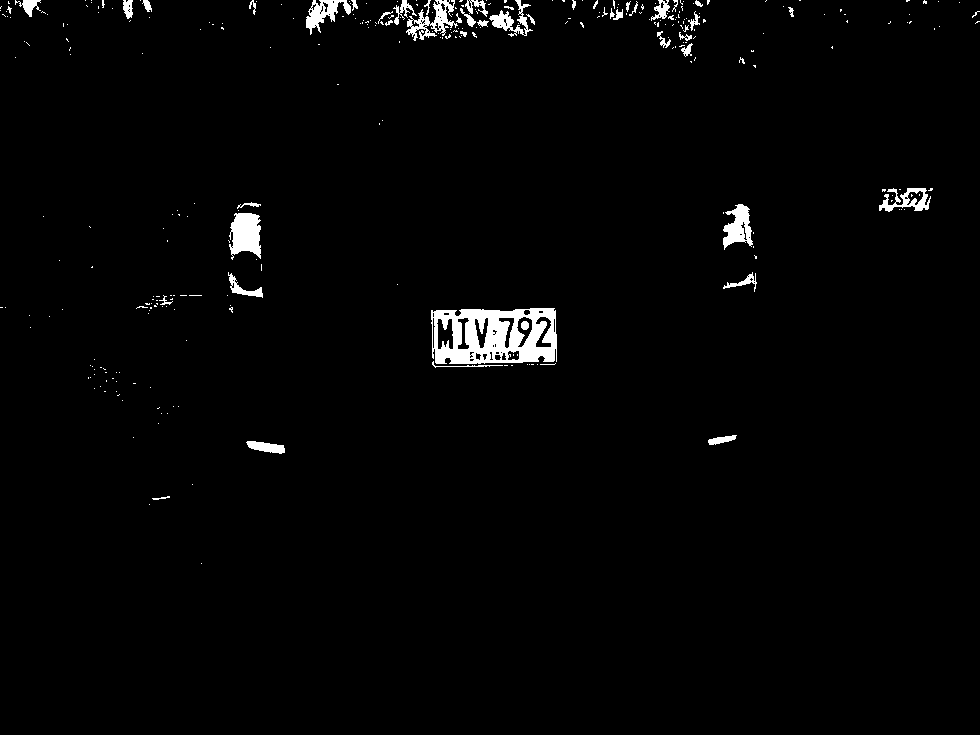

In [16]:
a = cv2.imread('placa_bina.png',0) #Leemos nuestra imagen de dos dimensiones
b = a.copy() #Creamos una copia
fil,col = b.shape #Guardamos sus dimensiones en variables separadas
cv2_imshow(b)

## Aplicamos la mascara

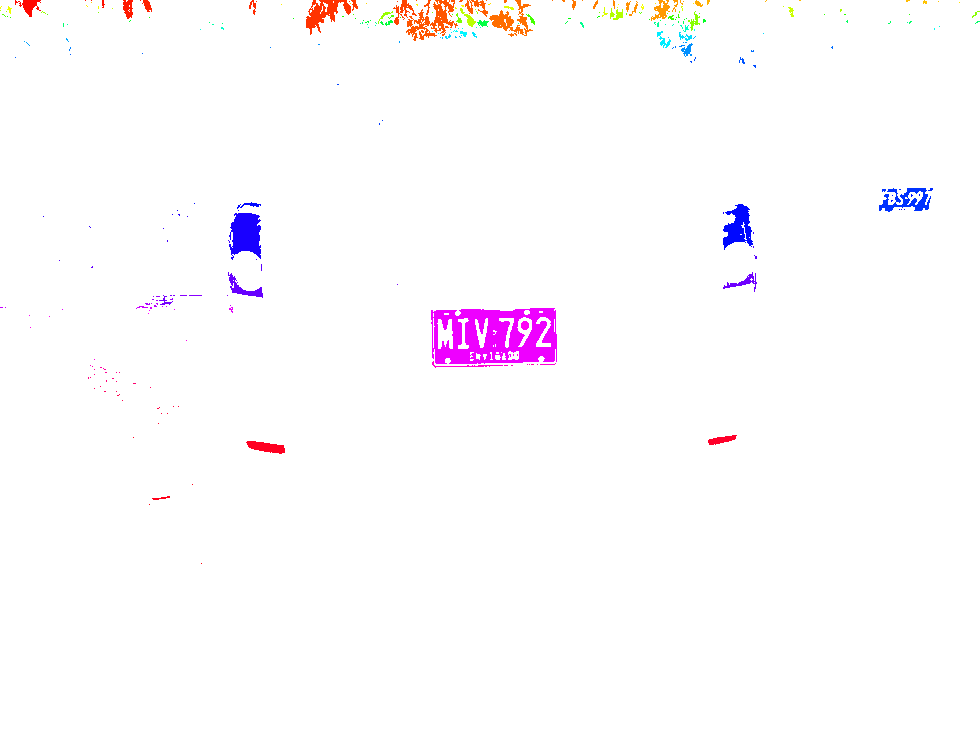

In [18]:
a = cv2.threshold(a,127,255,cv2.THRESH_BINARY)[1] #Convertimos nuestra imagen para hacerla de una sola dimensión para poder aplicar la función de conectividad con la cual etiquetaremos las secciones que están interconectadas
ret, labels = cv2.connectedComponents(a,4) #Guardamos el número de etiquetas y una matriz que contiene el valor de cada pixel (La etiqueta que le corresponde)
#MAP COMPONENTS TO HUE VAL (formula to hsv) Con esta formula tomamos la matriz de etiquetas resultantes y creamos una imagen con pseudo colores de nuestra imagen original pero con los pixeles que comparten etiqueta del mismo color
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_a = cv2.merge([label_hue, blank_ch, blank_ch])
#cvt to bgr for display
labeled_a = cv2.cvtColor(labeled_a, cv2.COLOR_HSV2BGR)
#Convert background to black
labeled_a[label_hue==0] = 255 #Convertimos en cero los pixeles que en la matriz de etiquetas son cero
cv2_imshow(labeled_a)


## Graficamos la distribución de pixeles

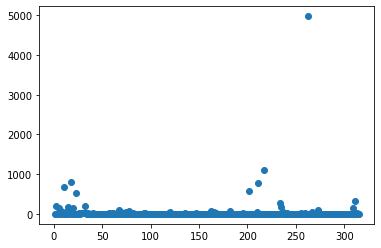

In [19]:
#Con las dos líneas de código anteriores hacemos cero los valores no etiquetados para mostrarlos en negro
total = [] #Creamos un arreglo para guardar el numero de pixeles que comparten cada etiqueta por etiqueta
valor = 0 #Variable que almacenará el número de pixeles que comparten una etiqueta
#Con las dos líneas de código anteriores hacemos cero los valores no etiquetados para mostrarlos en negro
for i in range (1,ret): #Con este ciclo for guardamos el número de pixeles que tiene cada etiqueta y lo guardamos en una lista
    valor = i
    c = b*0
    c[labels == i] = 1
    suma = np.sum(c)
    total = [(valor,suma)] + total
x_list = [l[0] for l in total] #Extraemos de la lista el valor de cada etiqueta
y_list = [l[1] for l in total] #Extraemos el valor de la suma de cada etiqueta

y_list = np.uint32(y_list) #Convertimos los valores obtenidos en la suma de pixeles de la etiqueta a 32 bits
plt.scatter(x_list,y_list) # Graficamos los calor x = etiquetas y = valor suma pixeles etiquera
plt.show() #Mostramos la gráfica

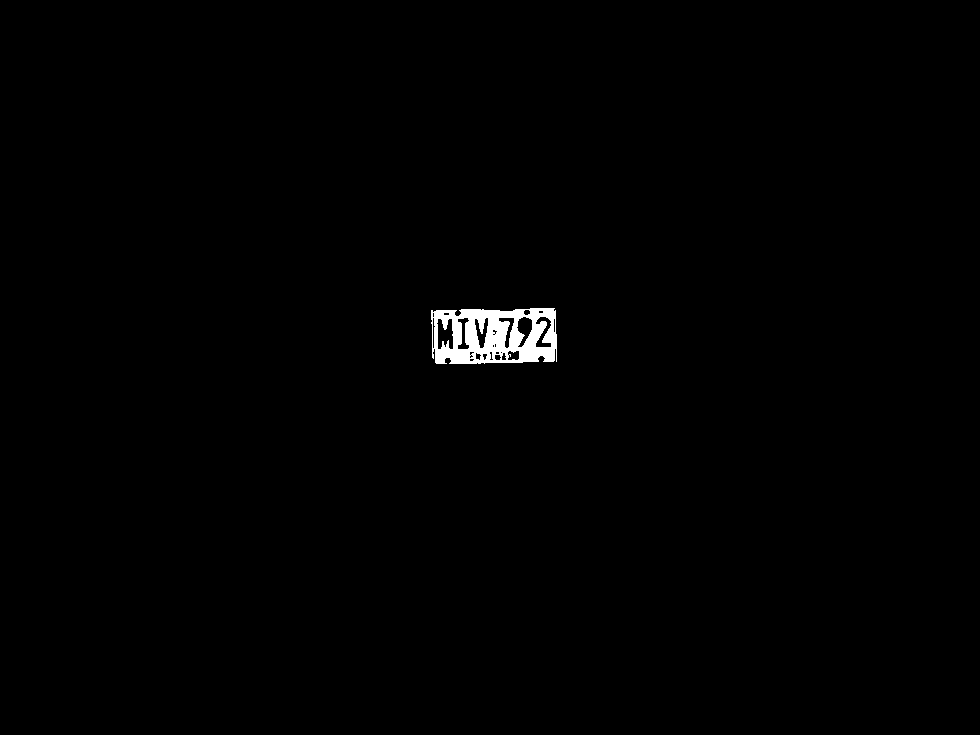

In [23]:

d = cv2.imread('carro_shape.jpg',1) #Leemos la imagen que extraímos en formato s de hsv
mx = np.max(total) #Buscamos la etiqueta que tienen el mayor número de pixeles interconectados
ind = []
ind = np.where(mx==total) # Guardamos en un arreglo cada pixel que tenga el valor de mx
c = b*0 # Creamos una matriz vacia del tamaño de b (La imagen que tenemos de carro en 3 capas)
c[labels == 262] = 255 #Cada pixel que tenga el valor de la etiqueta con más pixeles que la conforman lo hacemos 255 (negro)
cv2_imshow(c)  #Mostramos la imagen obtenida en la linea de código anterior
x,y = np.where(c>0) #Guardamos las coordenadas de cada pixel en negro (255) de C
fm = np.min(x) #Guardamos su valor mínimo en x
fx = np.max(x) #Guardamos su valor máximo en x
cm = np.min(y) #Guardamos su valor mínimo en y
cx = np.max(y) #Guardamos su valor máximo en y
d = d[fm:fx,cm:cx,:] #Tomamos de la imagen origianl el area encerrada por los valores obtenido en las cuatro líneas de código anterior


## Resultado placa

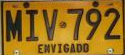

In [22]:
cv2_imshow(d) #Mostramos la imagen obtenida